In [12]:
#Data Understanding
import os
base_dir = 'D:\SEMESTER 6\Pengolahan Citra Digital\Praktikum Morfologi dan CNN\LATIHAN CNN\Flowersdiff'

print(os.listdir(base_dir))

# Menghitung jumlah gambar pada dataset
number_label = {}
total_files = 0
for i in os.listdir(base_dir):
    counting = len(os.listdir(os.path.join(base_dir, i)))
    number_label[i] = counting
    total_files += counting

print("Total Files : " + str(total_files))



['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
Total Files : 1304


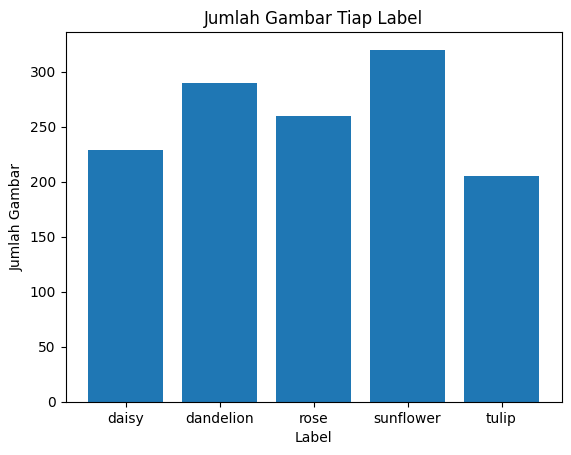

In [13]:
# Visualisasi jumlah gambar tiap kelas
import matplotlib.pyplot as plt

plt.bar(number_label.keys(), number_label.values());
plt.title("Jumlah Gambar Tiap Label");
plt.xlabel('Label');
plt.ylabel('Jumlah Gambar');

In [14]:
#Data Preparation
# Menggunakan ImageDataGenerator untuk preprocessing
import tensorflow as tf

IMAGE_SIZE = (200,200)
BATCH_SIZE = 32
SEED = 999


datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.2
)
# Menyiapkan data train dan data validation
train_data = datagen.flow_from_directory(
    base_dir,
    class_mode='categorical',
    subset='training',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED
)

valid_data = datagen.flow_from_directory(
    base_dir,
    class_mode='categorical',
    subset='validation',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED
)

# Image Augmentation
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(IMAGE_SIZE[0],
                                  IMAGE_SIZE[1],
                                  3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.Rescaling(1./255)
  ]
)

Found 1044 images belonging to 5 classes.
Found 260 images belonging to 5 classes.


In [15]:
# Membuat arsitektur model CNN
cnn_model = tf.keras.models.Sequential([
  data_augmentation,
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

# Compiling model
cnn_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

In [17]:
# Training model CNN
cnn_hist = cnn_model.fit(
    train_data,
    epochs=10,
    validation_data = valid_data
)

Epoch 1/10
33/33 [==============================] - 187s 5s/step - loss: 1.4291 - accuracy: 0.3573 - val_loss: 1.1936 - val_accuracy: 0.4962
Epoch 2/10
33/33 [==============================] - 170s 5s/step - loss: 1.1276 - accuracy: 0.5354 - val_loss: 1.0503 - val_accuracy: 0.5692
Epoch 3/10
33/33 [==============================] - 130s 4s/step - loss: 1.0398 - accuracy: 0.5623 - val_loss: 1.0140 - val_accuracy: 0.6192
Epoch 4/10
33/33 [==============================] - 119s 4s/step - loss: 1.0721 - accuracy: 0.5824 - val_loss: 0.9535 - val_accuracy: 0.6538
Epoch 5/10
33/33 [==============================] - 123s 4s/step - loss: 0.9430 - accuracy: 0.6331 - val_loss: 0.9471 - val_accuracy: 0.6385
Epoch 6/10
33/33 [==============================] - 122s 4s/step - loss: 0.9183 - accuracy: 0.6590 - val_loss: 0.9640 - val_accuracy: 0.6077
Epoch 7/10
33/33 [==============================] - 138s 4s/step - loss: 0.8667 - accuracy: 0.6628 - val_loss: 1.0365 - val_accuracy: 0.6500
Epoch 8/10
33

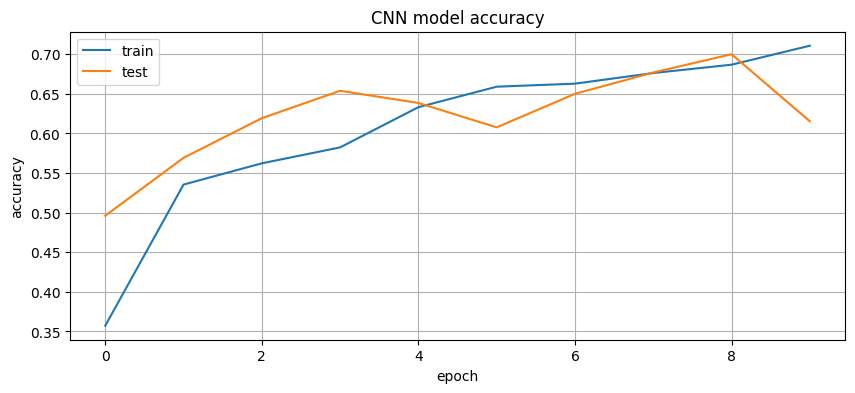

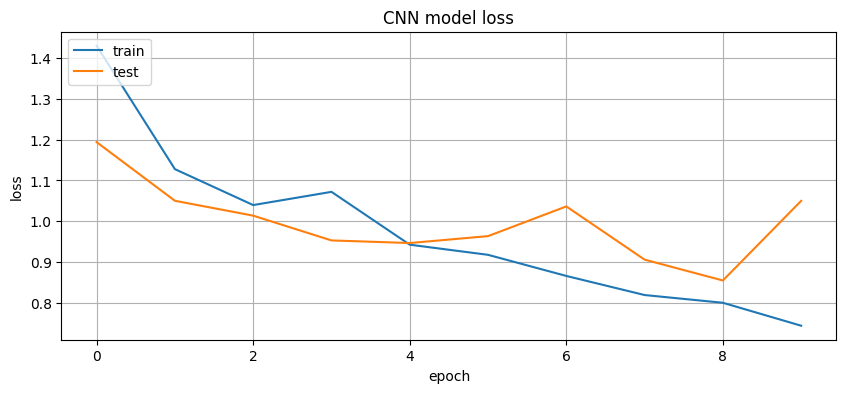

In [18]:
# Membuat plot akurasi model CNN
plt.figure(figsize=(10,4))
plt.plot(cnn_hist.history['accuracy'])
plt.plot(cnn_hist.history['val_accuracy'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model CNN
plt.figure(figsize=(10,4))
plt.plot(cnn_hist.history['loss'])
plt.plot(cnn_hist.history['val_loss'])
plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()


In [19]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
## Loading VGG16 model
base_vgg_model = VGG16(weights="imagenet", include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
base_vgg_model.trainable = False

# Preprocessing Input
vgg_preprocess = tf.keras.applications.vgg16.preprocess_input
train_data.preprocessing_function = vgg_preprocess
# Transfer learning dengan VGG16
vgg_model = tf.keras.models.Sequential([
  data_augmentation,
  base_vgg_model,
  tf.keras.layers.Dropout(0.7),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

# Compiling model
vgg_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

In [20]:
# Melatih model VGG16
vgg_hist = vgg_model.fit(
    train_data,
    epochs=10,
    validation_data = valid_data
)

Epoch 1/10
33/33 [==============================] - 945s 28s/step - loss: 1.2906 - accuracy: 0.4751 - val_loss: 0.7638 - val_accuracy: 0.7154
Epoch 2/10
33/33 [==============================] - 778s 24s/step - loss: 0.8081 - accuracy: 0.7088 - val_loss: 0.6328 - val_accuracy: 0.7808
Epoch 3/10
33/33 [==============================] - 833s 25s/step - loss: 0.7237 - accuracy: 0.7385 - val_loss: 0.6476 - val_accuracy: 0.7654
Epoch 4/10
33/33 [==============================] - 761s 23s/step - loss: 0.5791 - accuracy: 0.7893 - val_loss: 0.5769 - val_accuracy: 0.7962
Epoch 5/10
33/33 [==============================] - 697s 21s/step - loss: 0.5426 - accuracy: 0.8103 - val_loss: 0.5662 - val_accuracy: 0.8154
Epoch 6/10
33/33 [==============================] - 786s 24s/step - loss: 0.5059 - accuracy: 0.8209 - val_loss: 0.5673 - val_accuracy: 0.8038
Epoch 7/10
33/33 [==============================] - 779s 24s/step - loss: 0.4725 - accuracy: 0.8266 - val_loss: 0.6058 - val_accuracy: 0.8154
Epoch 

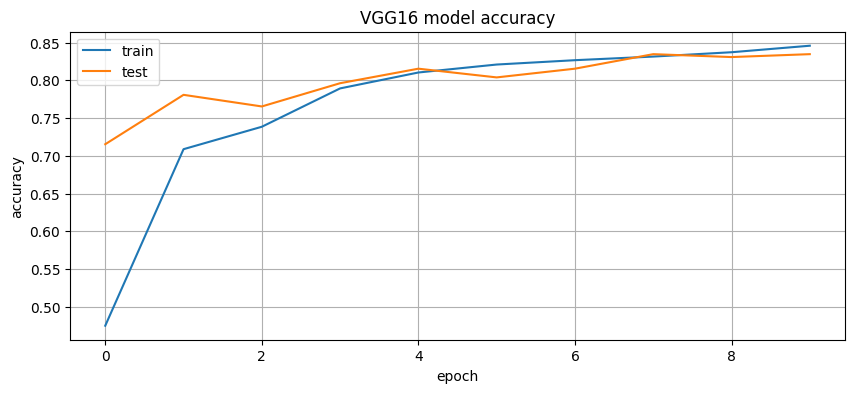

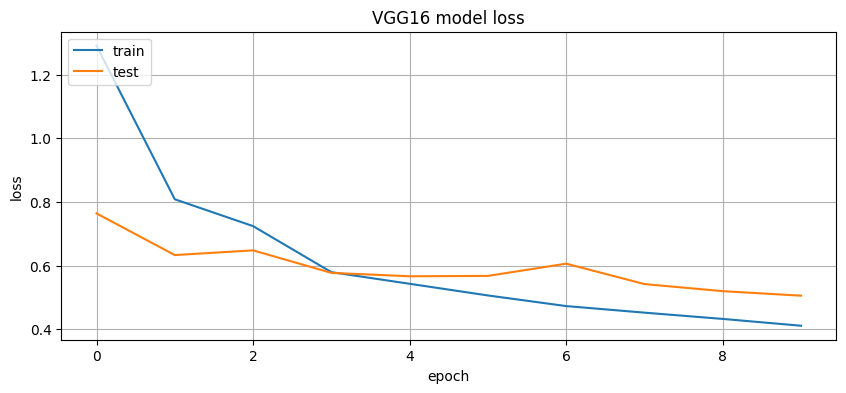

In [21]:
# Membuat plot akurasi model VGG16
plt.figure(figsize=(10,4))
plt.plot(vgg_hist.history['accuracy'])
plt.plot(vgg_hist.history['val_accuracy'])
plt.title('VGG16 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model VGG16
plt.figure(figsize=(10,4))
plt.plot(vgg_hist.history['loss'])
plt.plot(vgg_hist.history['val_loss'])
plt.title('VGG16 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [22]:
from tensorflow.keras.applications import ResNet50

# Loading ResNet50 model
base_resnet_model = ResNet50(include_top=False,
                   input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3),
                   pooling='max',classes=5,
                   weights='imagenet')

base_resnet_model.trainable = False

train_data.preprocessing_function = tf.keras.applications.resnet50.preprocess_input


# Transfer learning ResNet50
resnet_model = tf.keras.models.Sequential([
    data_augmentation,
    base_resnet_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])
# Compiling model
resnet_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

94765736/94765736 [==============================] - 83s 1us/step


In [23]:
# Melatih model ResNet50
resnet_hist = resnet_model.fit(
    train_data,
    epochs=10,
    validation_data = valid_data
)

Epoch 1/10
33/33 [==============================] - 454s 13s/step - loss: 1.9318 - accuracy: 0.2050 - val_loss: 1.5459 - val_accuracy: 0.3077
Epoch 2/10
33/33 [==============================] - 404s 12s/step - loss: 1.6579 - accuracy: 0.2423 - val_loss: 1.5216 - val_accuracy: 0.2885
Epoch 3/10
33/33 [==============================] - 523s 16s/step - loss: 1.6101 - accuracy: 0.2443 - val_loss: 1.4806 - val_accuracy: 0.3808
Epoch 4/10
33/33 [==============================] - 406s 12s/step - loss: 1.5973 - accuracy: 0.3094 - val_loss: 1.5157 - val_accuracy: 0.3308
Epoch 5/10
33/33 [==============================] - 390s 12s/step - loss: 1.5262 - accuracy: 0.3266 - val_loss: 1.6236 - val_accuracy: 0.2615
Epoch 6/10
33/33 [==============================] - 471s 14s/step - loss: 1.5932 - accuracy: 0.3036 - val_loss: 1.4635 - val_accuracy: 0.3769
Epoch 7/10
33/33 [==============================] - 485s 15s/step - loss: 1.5599 - accuracy: 0.3218 - val_loss: 1.4604 - val_accuracy: 0.3846
Epoch 

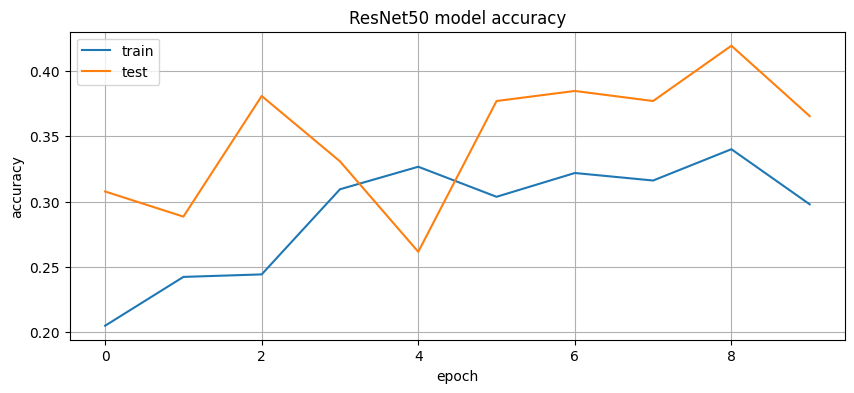

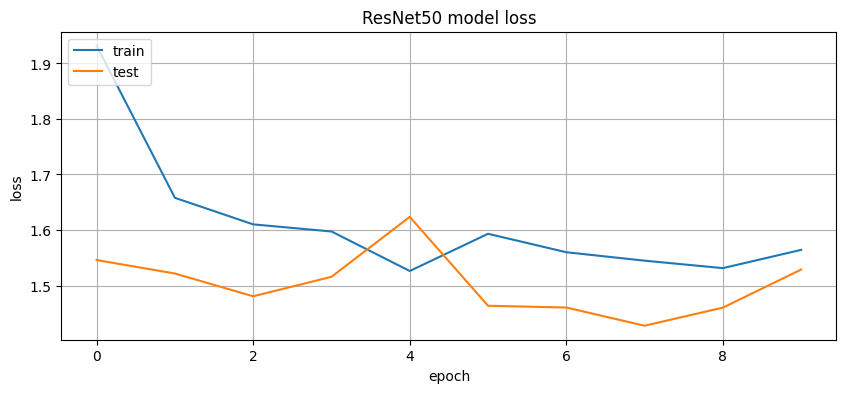

In [24]:
# Membuat plot akurasi model ResNet50
plt.figure(figsize=(10,4))
plt.plot(resnet_hist.history['accuracy'])
plt.plot(resnet_hist.history['val_accuracy'])
plt.title('ResNet50 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model ResNet50
plt.figure(figsize=(10,4))
plt.plot(resnet_hist.history['loss'])
plt.plot(resnet_hist.history['val_loss'])
plt.title('ResNet50 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [25]:
# Loading DenseNet201 model
base_densenet_model = tf.keras.applications.DenseNet201(include_top=False,
                                                        weights='imagenet',
                                                        input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
                                                        pooling='max')
base_densenet_model.trainable=False
train_data.preprocessing_function = tf.keras.applications.densenet.preprocess_input

74836368/74836368 [==============================] - 79s 1us/step


In [26]:
# Transfer learning DenseNet201
densenet_model = tf.keras.models.Sequential([
  data_augmentation,
  base_densenet_model,
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

# Compiling model
densenet_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

In [27]:
# Melatih model DenseNet201
densenet_hist = densenet_model.fit(
    train_data,
    epochs=20,
    validation_data = valid_data
)

Epoch 1/20
33/33 [==============================] - 605s 16s/step - loss: 1.1579 - accuracy: 0.5776 - val_loss: 0.5076 - val_accuracy: 0.8577
Epoch 2/20
33/33 [==============================] - 587s 18s/step - loss: 0.5472 - accuracy: 0.8036 - val_loss: 0.3752 - val_accuracy: 0.8769
Epoch 3/20
33/33 [==============================] - 547s 17s/step - loss: 0.3807 - accuracy: 0.8688 - val_loss: 0.3697 - val_accuracy: 0.9038
Epoch 4/20
33/33 [==============================] - 441s 14s/step - loss: 0.4016 - accuracy: 0.8563 - val_loss: 0.3829 - val_accuracy: 0.8846
Epoch 5/20
33/33 [==============================] - 435s 13s/step - loss: 0.3187 - accuracy: 0.8860 - val_loss: 0.4404 - val_accuracy: 0.8692
Epoch 6/20
33/33 [==============================] - 423s 13s/step - loss: 0.2976 - accuracy: 0.9042 - val_loss: 0.3667 - val_accuracy: 0.8846
Epoch 7/20
33/33 [==============================] - 398s 12s/step - loss: 0.2878 - accuracy: 0.8889 - val_loss: 0.3703 - val_accuracy: 0.8808
Epoch 

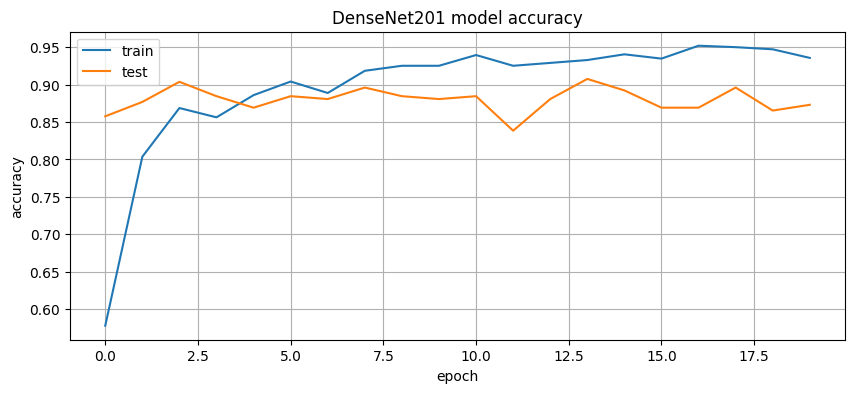

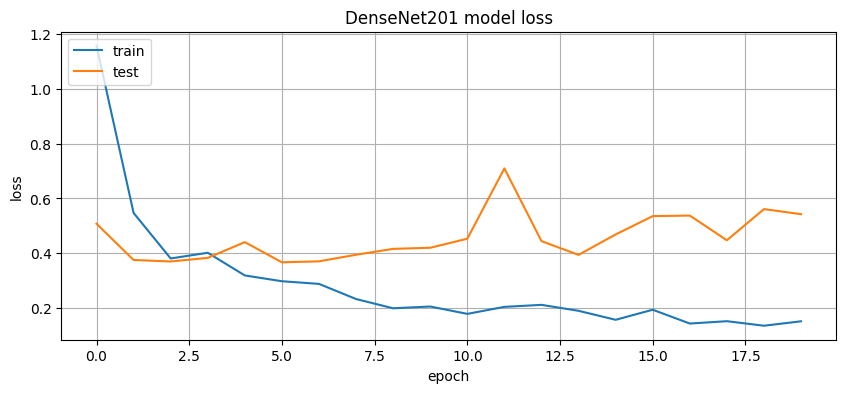

In [31]:
# Membuat plot akurasi model DenseNet201
plt.figure(figsize=(10,4))
plt.plot(densenet_hist.history['accuracy'])
plt.plot(densenet_hist.history['val_accuracy'])
plt.title('DenseNet201 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model DenseNet201
plt.figure(figsize=(10,4))
plt.plot(densenet_hist.history['loss'])
plt.plot(densenet_hist.history['val_loss'])
plt.title('DenseNet201 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

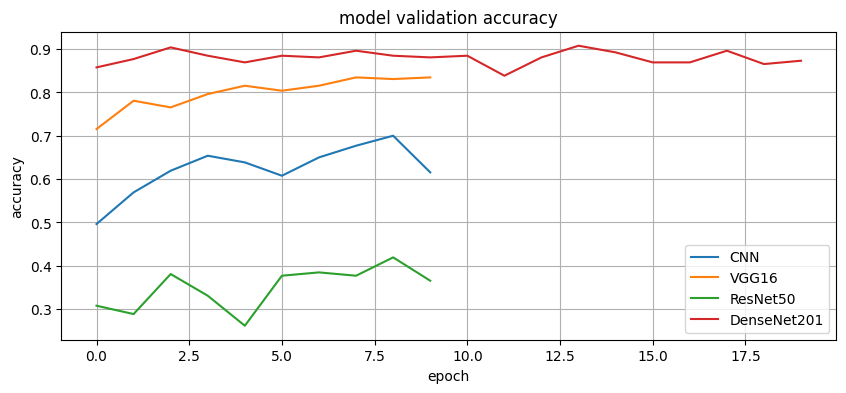

In [32]:
# Membuat plot akurasi empat model sebelumnya untuk dibandingkan
plt.figure(figsize=(10,4))
plt.plot(cnn_hist.history['val_accuracy'])
plt.plot(vgg_hist.history['val_accuracy'])
plt.plot(resnet_hist.history['val_accuracy'])
plt.plot(densenet_hist.history['val_accuracy'])
plt.title('model validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['CNN', 'VGG16', 'ResNet50', 'DenseNet201'], loc='lower right')
plt.grid(True)
plt.show()

In [33]:
# Menampilkan daftar kelas atau label gambar
train_data.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [49]:
# Menguji coba model
import numpy as np
from keras.preprocessing import image
import cv2



#file upload, kode di bawah in hanya bisa dijalankan di google colab dengan mengimport from google.colab import files. Silahkan kalian ganti kodingannya agar bisa upload di jupyter notebook masing-masing 
#atau kalian langsung import file gambarnya langsung
uploaded = plt.imread('D:\SEMESTER 6\Pengolahan Citra Digital\image\Dandelion.jpg')
 
for fn in uploaded.keys():
 
  # prediksi gambar
  path = fn
  img = image.load_img(path, target_size=IMAGE_SIZE)
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = densenet_model.predict(images, batch_size=BATCH_SIZE)
  classes = np.argmax(classes)
  
  print(fn)
  if classes==0:
    print('daisy')
  elif classes==1:
    print('dandelion')
  elif classes==2:
    print('rose')
  elif classes==3:
    print('sunflower')
  else:
    print('tulip')

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

In [44]:
densenet_model.save('model-flowers-recognition.h5')

In [47]:
converter = tf.lite.TFLiteConverter.from_keras_model(densenet_model)
tflite_model = converter.convert()
with tf.io.gfile.GFile('model-flowers-recognition.tflite', 'wb') as f:
  f.write(tflite_model)

KeyboardInterrupt: 